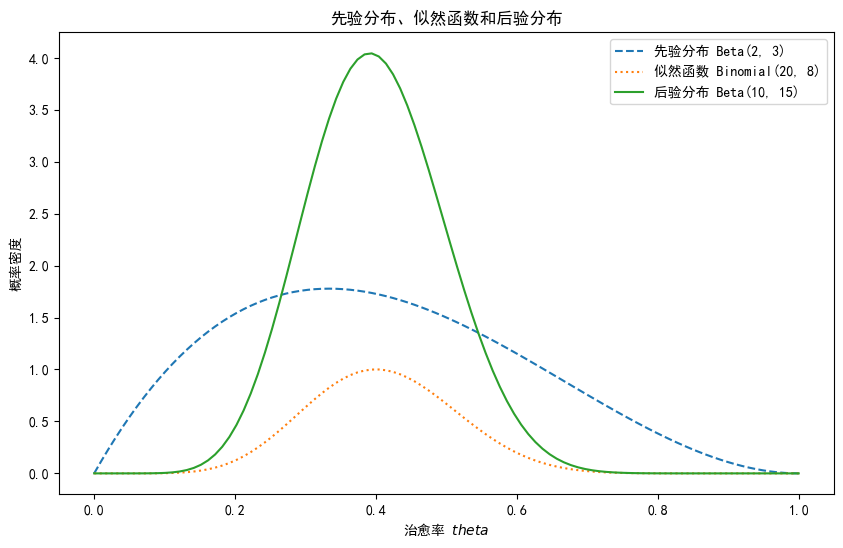

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

# 设置中文字体为 SimHei（黑体），这是一种常用的中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置参数
alpha_prior, beta_prior = 2, 3 #由theta的期望根据所选择的分布，再根据选择的分布来确定的参数
n, k = 20, 8 # 在观测数据中得到的案例
alpha_posterior, beta_posterior = alpha_prior + k, beta_prior + (n - k) #由贝叶斯公式和所选择的先验分布还有案例的似然函数共同决定的参数

# 创建theta值
theta = np.linspace(0, 1, 100) #希望估计的theta值的区间范围，并在区间内分为100个点

# 计算先验分布、似然函数和后验分布
# 注意区分PMF(连续)和PDF(离散)
prior = beta.pdf(theta, alpha_prior, beta_prior) # beta分布的概率密度函数的计算公式
likelihood = binom.pmf(k, n, theta) # 案例符合二项分布，binom分布的概率质量函数计算公式
posterior = beta.pdf(theta, alpha_posterior, beta_posterior)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(theta, prior, label='先验分布 Beta(2, 3)', linestyle='--')
plt.plot(theta, likelihood / np.max(likelihood), label='似然函数 Binomial(20, 8)', linestyle=':')
plt.plot(theta, posterior, label='后验分布 Beta(10, 15)')
plt.xlabel('治愈率 $theta$')
plt.ylabel('概率密度')
plt.title('先验分布、似然函数和后验分布')
plt.legend()
plt.show()
